In [42]:
import musclebeachtools as mbt
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import pandas as pd
import eccojams as eco

<img src="../eccojams_text_logo.png" style="width:700px;height:209px;margin-left:auto;margin-right:auto;"/>

<div style="background-color:lightblue;color:black;padding:20px;font-family:verdana;">
  <p>In this notebook I'll introduce you to some common usages of the key functions in <i>Eccojams</i>.</p>
  <p>A typical use case would be to employ these functions for processing and analysis of neuron class object data as produced with the <i>musclebeachtools</i> package (<a href="https://github.com/hengenlab/musclebeachtools_hlab">see here</a>).</p>
   <p>I've also included some example data in the same folder as this notebook.</p>
</div> 

<h2 style="font-family:verdana">Load data from numpy file.</h2>

In [76]:
neurons = np.load('example_data/example_singleunits.npy',allow_pickle=True)

In [77]:
eco.nrnlistinfo(neurons)

There are 55 neurons  in this file.
Recording is  11.92 hours  long. 
These neurons are from the following animal(s):
['CAF82']
These neurons are in the following region(s):
['CA1' 'RSC']
These neurons are under the following conditions(s):
['WT']


<h2 style="font-family:verdana;">Subset neuron list by different criteria.</h2>

In [78]:
nrns_q1 = eco.nrnlist_by_quality(neurons,[1])

In [79]:
nrns_ca1 = eco.nrnlist_by_region(neurons,'CA1')

In [80]:
nrns_caf82 = eco.nrnlist_by_animal(neurons,'CA1')

In [81]:
nrns_wt = eco.nrnlist_by_genotype(neurons,'WT')

In [82]:
nrns_ca1_rsu = eco.nrnlist_by_celltype(nrns_ca1,'RSU')

<h2 style="font-family:verdana">Check quality statistics for all neurons in list.</h2>

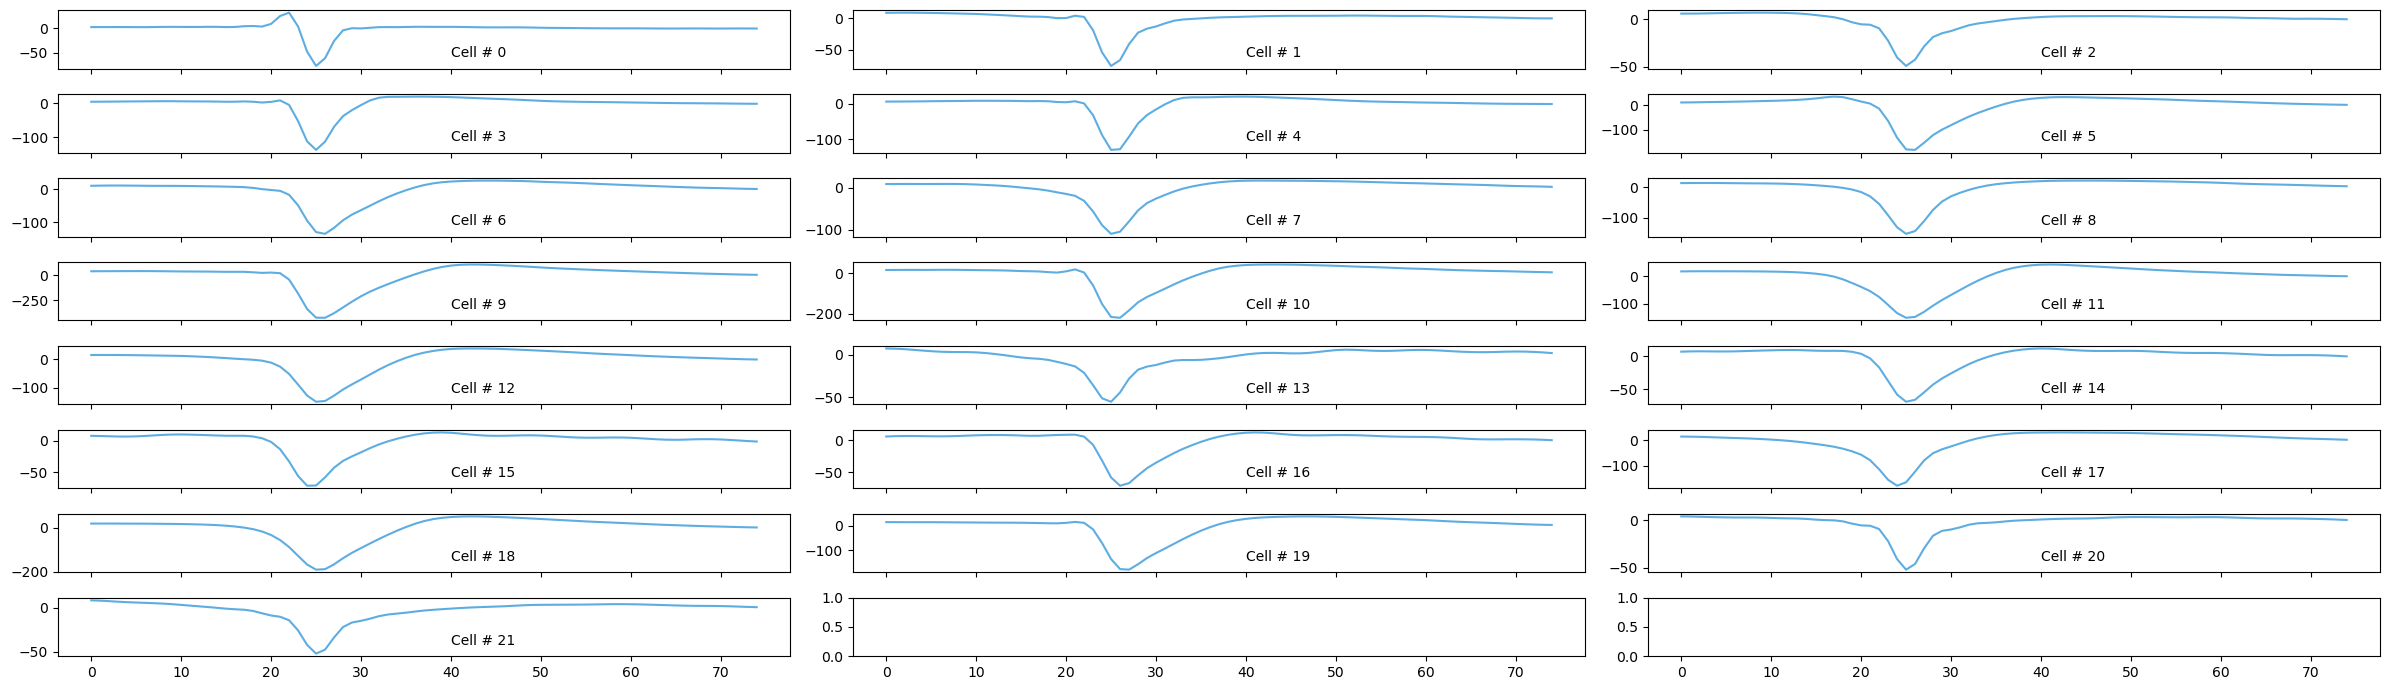

In [9]:
eco.check_wfs(nrns_ca1_rsu)

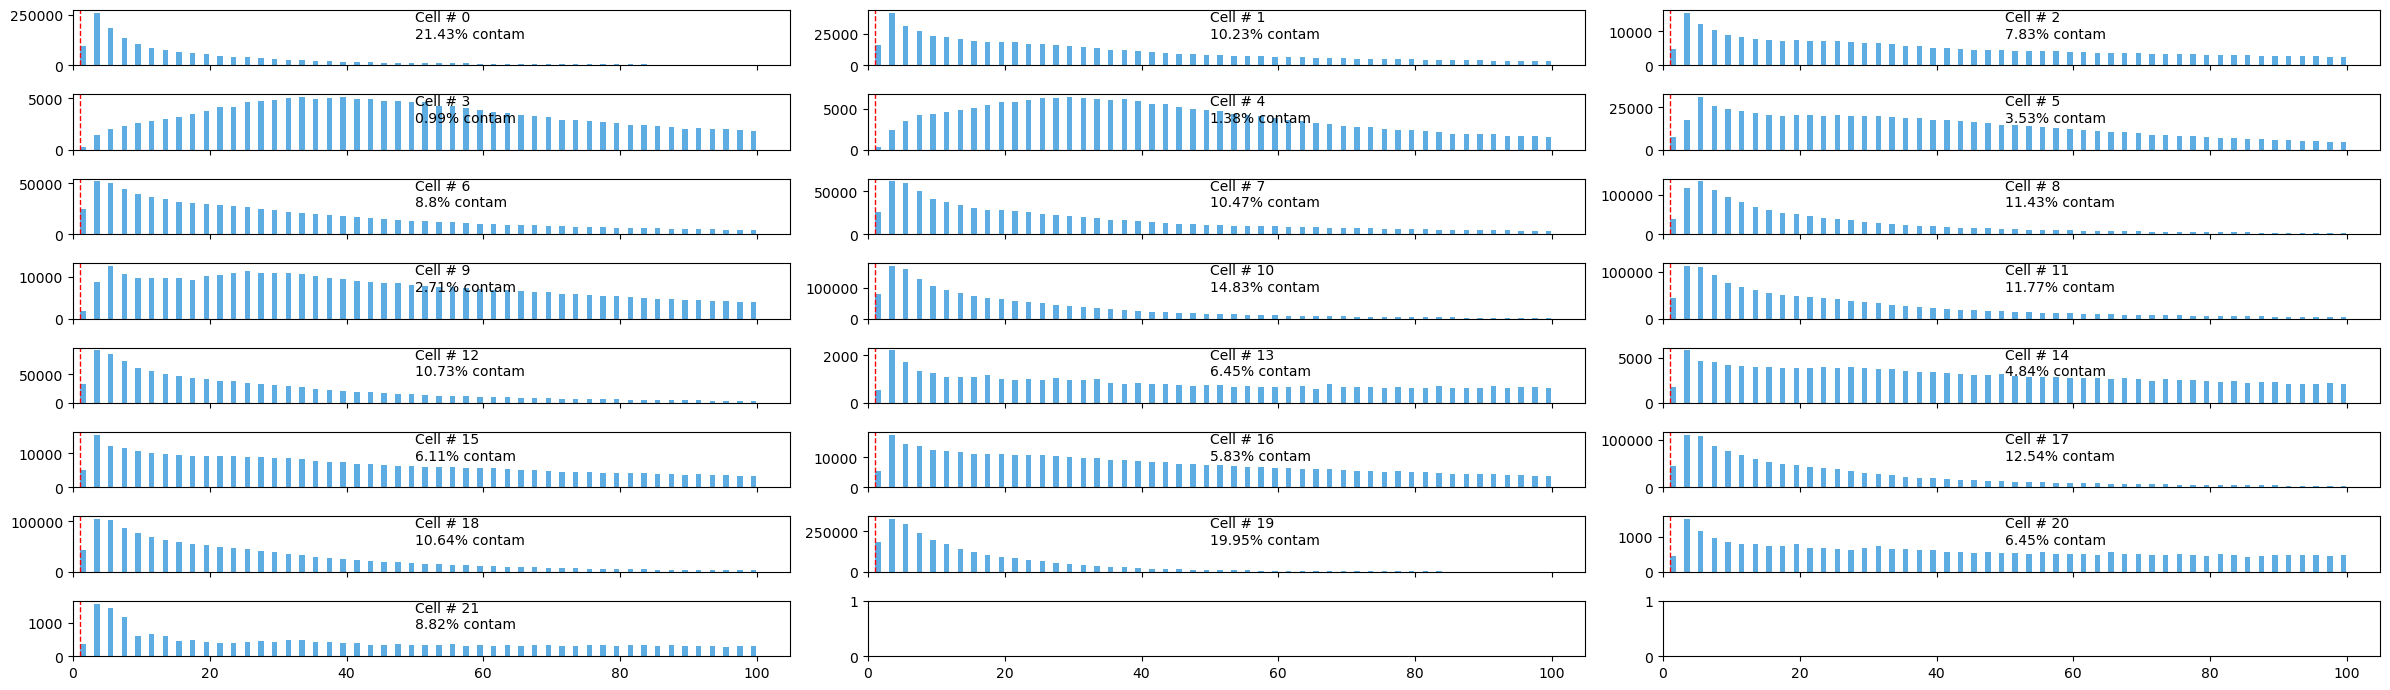

In [10]:
eco.check_isi(nrns_ca1_rsu)

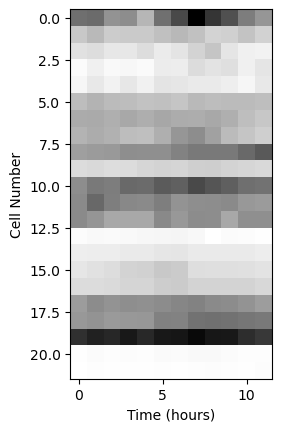

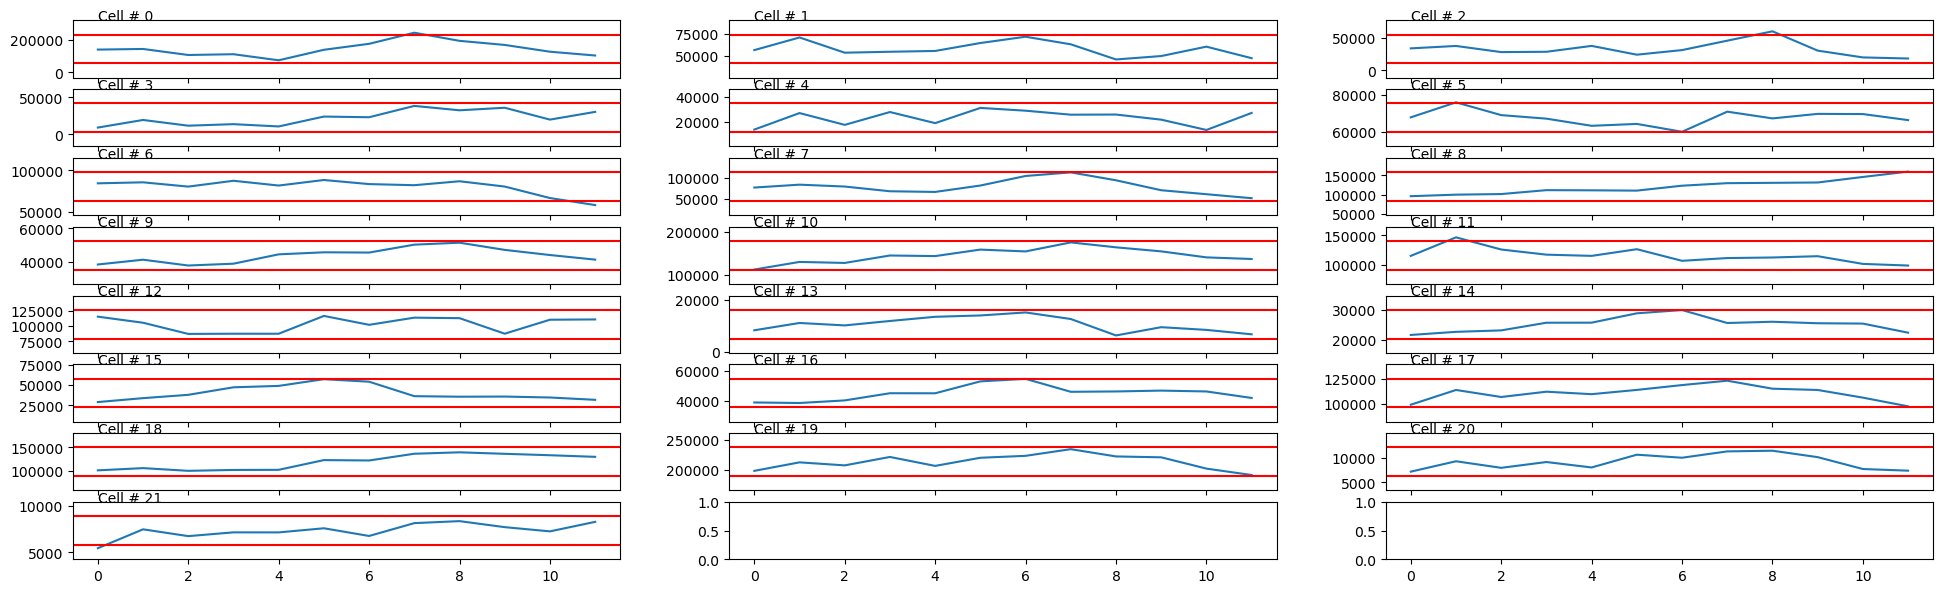

In [11]:
eco.check_continuity(nrns_ca1_rsu)

<h2 style="font-family:verdana">Plot activity of selected neurons.</h2>

/Users/sbrunwas/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py:365: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spikeraster = np.asarray(spike_timestamps)
/Users/sbrunwas/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py:393: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_yticks(np.arange(len(cellstoplot)),celllabels)


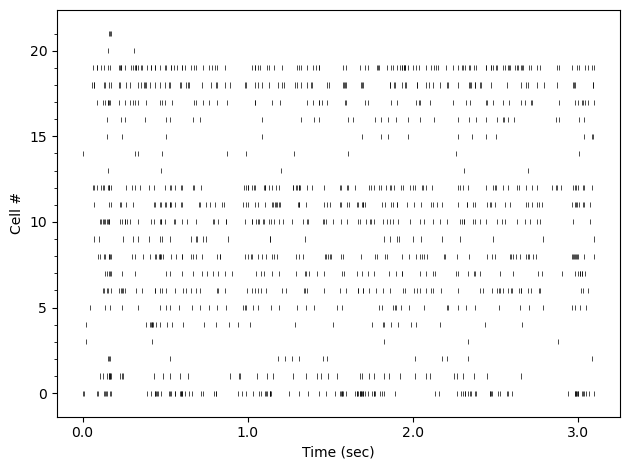

In [12]:
eco.plot_raster(nrns_ca1_rsu,starttime=0,endtime=3.1)

<h4 style="font-family:verdana">Bin spike data.</h4>

In [13]:
nrn_binned = eco.bin_spikes(nrns_ca1_rsu, binsize=1)

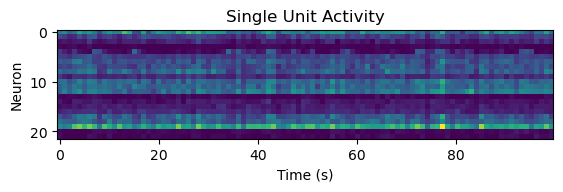

In [14]:
plt.imshow(nrn_binned[:,:100])
plt.xlabel('Time (s)')
plt.ylabel('Neuron')
plt.title('Single Unit Activity')
plt.show()

<h4 style="font-family:verdana">Shuffle binned data.</h4>

In [15]:
eco.shuffle_binned_data?

Signature: eco.shuffle_binned_data(binned_data, randmethod=3, plotdata=0)
Docstring:
####METHODS########
# 1 - random shuffled
# 2 - random shuffled, boostrapped
# 3 - random poisson FR (statistically matched)
# 4 - random poisson FR (statistically matched), boostrapped
# 5 - random shift
# 6 - random shift, bootstrapped
File:      ~/anaconda3/envs/spikewords/lib/python3.7/site-packages/eccojams/eccojams.py
Type:      function


In [16]:
nrns_shuffled = eco.shuffle_binned_data(nrn_binned,randmethod=5)

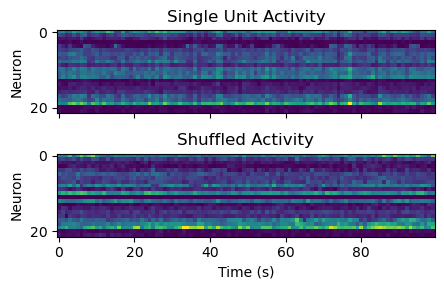

In [17]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(7,3))
ax[0].imshow(nrn_binned[:,:100])
ax[0].set_ylabel('Neuron')
ax[0].set_title('Single Unit Activity')
ax[1].imshow(nrns_shuffled[:,:100])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Neuron')
ax[1].set_title('Shuffled Activity')
plt.tight_layout()
plt.show()

<h4 style="font-family:verdana">Generate synthetic spike train.</h4>

In [77]:
from scipy.signal import square

In [78]:
prob_sin = np.sin(0.15*np.arange(1000))
spikes_sin = eco.spiketrain_from_probability(prob_sin)

In [79]:
prob_square = square(np.arange(1000), duty=0.5)
spikes_square = eco.spiketrain_from_probability(prob_square)

In [80]:
prob_complex = np.add(3*np.sin(0.05*np.arange(1000)),square(np.arange(1000), duty=0.5))
spikes_complex = eco.spiketrain_from_probability(prob_complex)

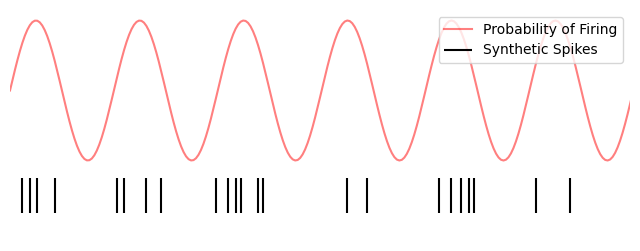

In [84]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_sin,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_sin,color='black',lineoffsets = -1.5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,250)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

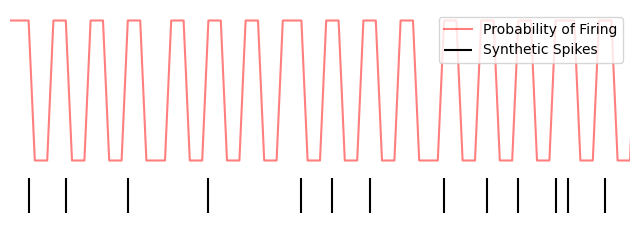

In [85]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_square,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_square,color='black',lineoffsets = -1.5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,100)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

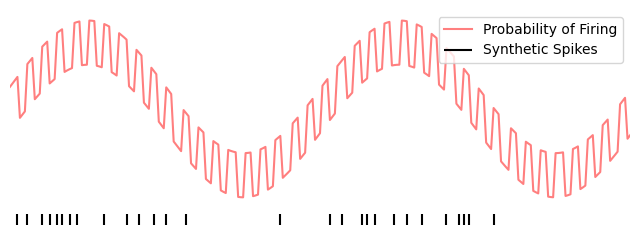

In [86]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(8,3))
ax.plot(prob_complex,color='red',alpha=0.5,label='Probability of Firing')
ax.eventplot(spikes_complex,color='black',lineoffsets = -5, linelengths = 0.5, label='Synthetic Spikes')
ax.set_xlim(0,250)
plt.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_yticks([])
ax.axis('off')
plt.show()

<h2 style="font-family:verdana">Load sleep and event data.</h2>

<h4 style="font-family:verdana">Dealing with lists of files.</4>

In [20]:
filelist = ['file1','file2','file10']

In [21]:
np.sort(filelist)

array(['file1', 'file10', 'file2'], dtype='<U6')

In [22]:
eco.natural_sort(filelist)

['file1', 'file2', 'file10']

In [23]:
rawfiles = eco.load_txt_as_list('example_data/files.txt')

In [24]:
rawfiles[:5]

['/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-50-00.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-55-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-00-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-05-01.bin',
 '/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-10-01.bin']

In [29]:
file1 = rawfiles[1]
file2 = rawfiles[2]
print(file1)
print(file2)

/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_12-55-01.bin
/media/bs004r/CAF00082/CAF00082_2021-03-04_12-50-01/Headstages_256_Channels_int16_2021-03-04_13-00-01.bin


In [30]:
timestamp1 = eco.binfile_to_timestamp(file1)
timestamp2 = eco.binfile_to_timestamp(file2)
print(timestamp1)
print(timestamp2)

2021-03-04_12-55-01
2021-03-04_13-00-01


In [31]:
eco.dtify(timestamp1)

datetime.datetime(2021, 3, 4, 12, 55, 1)

<i><b>How many seconds elapsed between the files?</b></i>

In [33]:
(eco.dtify(timestamp2) - eco.dtify(timestamp1)).seconds

300

<h4 style="font-family:verdana">Working with sleep states.</4>

In [48]:
sleepfiles = glob.glob('example_data/*sleep.npy')

In [49]:
sleepdf = eco.return_sleepdf(sleepfiles)

In [50]:
sleepdf.head()

,start_time,stop_time,sleepstate
0,0.0,252.0,2.0
1,252.0,332.0,3.0
2,332.0,1004.0,2.0
3,1004.0,1060.0,3.0
4,1060.0,1924.0,2.0


<h4 style="font-family:verdana">Load event times (sharp wave ripples).</4>

In [61]:
ripple_csv = glob.glob('example_data/ripple*.csv')[0]
rippledf = eco.get_riptimes(ripple_csv, peakdist = 0.1, ampthresh = 50)

In [62]:
rippledf.head()

,ripple_number,start_time,end_time,length,amplitude,file,sec_elapsed,peak_time
46,47,199.833333,199.862667,0.029333,54.517255,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,0,199.848000
78,79,257.452000,257.501333,0.049333,55.601663,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,0,257.476667
107,108,329.640000,329.707333,0.067333,60.730414,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,329.673667
108,109,340.895333,340.964000,0.068667,58.237573,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,340.929667
109,110,342.218000,342.266000,0.048000,123.454318,/media/bs004r/CAF00082/CAF00082_2021-03-04_12-...,300,342.242000


In [64]:
ripples_nrem = eco.riptimes_by_state(rippledf, sleepdf, 'nrem')

In [66]:
len(rippledf), len(ripples_nrem)

(19129, 11700)

<h2 style="font-family:verdana">Align and analyze spike data around events.</h2>

In [84]:
binsize=0.001
peri_rip_time = 0.5

In [98]:
peth = eco.bin_and_align_spikes(nrns_ca1_rsu[:10], ripples_nrem.peak_time[:100],
                                   binsize, peri_rip_time)

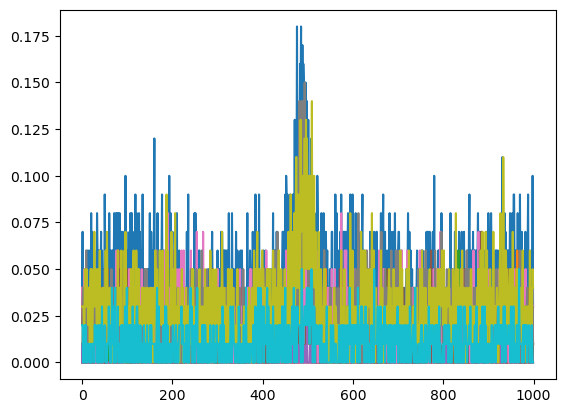

In [106]:
for i in np.arange(peth.shape[0]):
    plt.plot(np.mean(peth,axis=2)[i,:])
plt.show()

In [117]:
peth_smoothed = eco.smooth_spikes(np.mean(peth,axis=2), binsize, sigma=0.005)

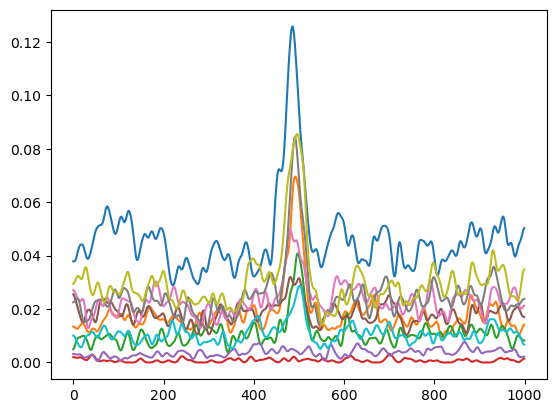

In [118]:
for i in np.arange(peth_z.shape[0]):
    plt.plot(peth_smoothed[i,:])
plt.show()

In [119]:
peth_z = eco.zscore_to_flank(peth_smoothed)

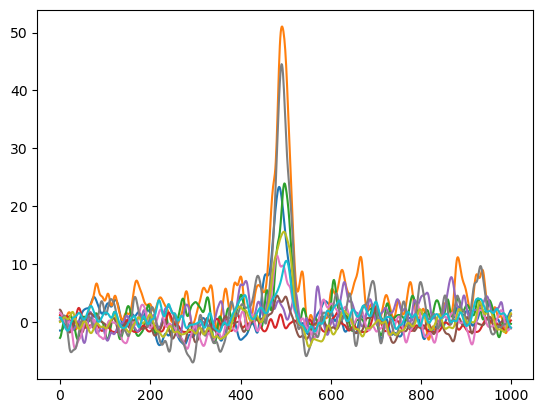

In [120]:
for i in np.arange(peth_z.shape[0]):
    plt.plot(peth_z[i,:])
plt.show()

<h2 style="font-family:verdana">Examine population statistics in spike data.</h2>

In [ ]:
eco.ccg_pair

In [ ]:
eco.ccg_tseries

In [ ]:
eco.cca_on_data

In [ ]:
eco.pca_on_data

In [ ]:
eco.factoranalysis_on_data

In [ ]:
eco.isomap_on_data